## Part 0: Defining "Big Idea"

### The mission of the Atlanta Police Department
1. to create a safer Atlanta by reducing crime
2. ensuring the safety of our citizens 
3. building trust in partnership with our community. 

[source](https://www.atlantaga.gov/government/departments/police#:~:text=The%20mission%20of%20the%20Atlanta,in%20partnership%20with%20our%20community.)

### [Report: Atlanta Georgia Crime Rate Statistics](https://gitnux.org/atlanta-georgia-crime-rate/#:~:text=Atlanta's%20crime%20rate%20is%20122,higher%20than%20the%20national%20average.)
- Atlanta's crime rate is 122% higher than the national average.
- The violent crime rate in Atlanta is 253% higher than the national average.
- The property crime rate in Atlanta is 98% higher than the national average.
- In 2020, Atlanta Police Department reported a total of 154 homicides.
- Atlanta's overall crime rate is higher than 97% of U.S. cities.
- Atlanta has a 1 in 25 chance of becoming a victim of any crime.

# Part 1

## Pre-Preparation

### Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_excel("APD_CrimeData_ver2.xlsx")
df.head()

,Report Number,Report Date,Day Occurred,Occur Date,Occur Time,Zone,Crime Type,ObjectId,Daydif
0,203581105,2020-12-23,Wednesday,2020-12-23,10:00:00,4,BURGLARY,1,0
1,203581144,2020-12-23,Wednesday,2020-12-23,17:16:00,5,LARCENY-FROM VEHICLE,2,0
2,203581174,2020-12-23,Saturday,2020-12-19,21:50:00,2,LARCENY-FROM VEHICLE,3,4
3,203581238,2020-12-23,Wednesday,2020-12-23,18:05:00,2,AUTO THEFT,4,0
4,203581247,2020-12-23,Wednesday,2020-12-23,18:12:00,2,LARCENY-NON VEHICLE,5,0


In [3]:
df[['Crime Type']].value_counts()

Crime Type          
LARCENY-FROM VEHICLE    101562
LARCENY-NON VEHICLE      73442
BURGLARY                 49331
AUTO THEFT               43207
AGG ASSAULT              24435
ROBBERY                  19793
HOMICIDE                  1029
dtype: int64

In [4]:
# 사용할 데이터만 잘라내기
df1 = df[['Crime Type','Daydif']]
df1.head()

,Crime Type,Daydif
0,BURGLARY,0
1,LARCENY-FROM VEHICLE,0
2,LARCENY-FROM VEHICLE,4
3,AUTO THEFT,0
4,LARCENY-NON VEHICLE,0


## Chi-Square Test

### 0) Hypothesis
#### Ho: There is no significant association between Crime Type and Daydif (Number of days taken for the crime case to be reported).
#### Ha: There is a significant association between Crime Type and Daydif.

### 1) Contingency Table: CrossTab

In [5]:
# 분할표(crosstab) 만들기
ct_table = pd.crosstab(df1['Crime Type'], df1['Daydif'], margins=False)
print('contingency_table :\n', ct_table)

contingency_table :
 Daydif                    0      1     2     3     4     5    6    7
Crime Type                                                          
AGG ASSAULT           22411   1542   199   112    57    49   35   30
AUTO THEFT            24481  14633  1686   998   549   401  241  218
BURGLARY              30986  10794  2602  1823  1138   756  541  691
HOMICIDE                693    274    35     7    10     5    1    4
LARCENY-FROM VEHICLE  65045  29887  2817  1640   894   548  388  343
LARCENY-NON VEHICLE   53033  10570  3116  2395  1482  1099  877  870
ROBBERY               18383   1101   130    80    44    28   16   11


### 2) Perform Test

In [6]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(ct_table)
 
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n")
print(pd.DataFrame(expected, index=ct_table.index, columns=ct_table.columns))

Chi-square statistic: 24863.463148418134
P-value: 0.0
Degrees of freedom: 42
Expected frequencies table:

Daydif                           0             1            2            3  \
Crime Type                                                                   
AGG ASSAULT           16797.710095   5374.545427   826.871170   551.117251   
AUTO THEFT            29702.421120   9503.498435  1462.108559   974.508822   
BURGLARY              33912.332175  10850.489071  1669.342405  1112.632090   
HOMICIDE                707.380548    226.331379    34.820971    23.208498   
LARCENY-FROM VEHICLE  69818.253844  22338.841115  3436.819715  2290.671997   
LARCENY-NON VEHICLE   50487.310202  16153.769807  2485.249537  1656.441709   
ROBBERY               13606.592016   4353.524765   669.787643   446.419634   

Daydif                          4           5           6           7  
Crime Type                                                             
AGG ASSAULT            326.061432  225.446405  

### 3) Conclusion: Reject Ho
Since the p-value is less than the chosen significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a significant association between the type of crime (Crime Type) and the number of days it took for an occured crime to be reported (Daydif). In other words, the distribution of crime types significantly differs across different intervals of number of days it took for an occured crime to be reported. 

**범죄종류와 |발생일-신고일| 간에 상관성이 존재한다.**

### 4) Run Test again with ONLY Violent Crimes / Property Crimes

#### 4-0) Hypothesis
##### Ho: There is no significant association between Violent/Property Crime Type and Number of days taken for the crime case to be reported (Daydif).
##### Ha: There is a significant association between Violent/Property Crime Type and Daydif.

In [29]:
violent_cond = (df1['Crime Type']=='AGG ASSAULT')|(df1['Crime Type']=='ROBBERY')|(df1['Crime Type']=='HOMICIDE')
violent = df1.loc[violent_cond]
violent # SIZE (45257,2)

,Crime Type,Daydif
5,AGG ASSAULT,0
14,AGG ASSAULT,0
23,AGG ASSAULT,1
30,AGG ASSAULT,0
32,AGG ASSAULT,0
...,...,...
312776,ROBBERY,1
312783,AGG ASSAULT,2
312784,HOMICIDE,0
312787,ROBBERY,0


In [31]:
proprty = df1.loc[~violent_cond]
proprty # SIZE (267542,2)

,Crime Type,Daydif
0,BURGLARY,0
1,LARCENY-FROM VEHICLE,0
2,LARCENY-FROM VEHICLE,4
3,AUTO THEFT,0
4,LARCENY-NON VEHICLE,0
...,...,...
312794,LARCENY-NON VEHICLE,1
312795,LARCENY-NON VEHICLE,1
312796,LARCENY-NON VEHICLE,0
312797,LARCENY-NON VEHICLE,1


#### 4-1) Contingency Table: CrossTab

violent => not significant

In [32]:
# 분할표(crosstab) 만들기
ct_violent = pd.crosstab(violent['Crime Type'], violent['Daydif'], margins=False)
print('contingency_table :\n', ct_violent)

ct_proprty = pd.crosstab(proprty['Crime Type'], proprty['Daydif'], margins=False)
print('contingency_table :\n', ct_proprty)

contingency_table :
 Daydif           0     1    2    3   4   5   6   7
Crime Type                                        
AGG ASSAULT  22411  1542  199  112  57  49  35  30
HOMICIDE       693   274   35    7  10   5   1   4
ROBBERY      18383  1101  130   80  44  28  16  11
contingency_table :
 Daydif                    0      1     2     3     4     5    6    7
Crime Type                                                          
AUTO THEFT            24481  14633  1686   998   549   401  241  218
BURGLARY              30986  10794  2602  1823  1138   756  541  691
LARCENY-FROM VEHICLE  65045  29887  2817  1640   894   548  388  343
LARCENY-NON VEHICLE   53033  10570  3116  2395  1482  1099  877  870


#### 4-2) Perform Test

In [26]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(ct_violent)
 
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n")
print(pd.DataFrame(expected, index=ct_violent.index, columns=ct_violent.columns))

Chi-square statistic: 886.0459259984435
P-value: 4.214102944642291e-180
Degrees of freedom: 14
Expected frequencies table:

Daydif                  0            1           2           3          4  \
Crime Type                                                                  
AGG ASSAULT  22399.514882  1574.936363  196.529598  107.443379  59.930729   
HOMICIDE       943.282210    66.323287    8.276200    4.524626   2.523786   
ROBBERY      18144.202908  1275.740350  159.194202   87.031995  48.545485   

Daydif               5          6          7  
Crime Type                                    
AGG ASSAULT  44.273151  28.075657  24.296241  
HOMICIDE      1.864419   1.182314   1.023157  
ROBBERY      35.862430  22.742029  19.680602  


In [33]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(ct_proprty)
 
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n")
print(pd.DataFrame(expected, index=ct_proprty.index, columns=ct_proprty.columns))

Chi-square statistic: 10447.837399961933
P-value: 0.0
Degrees of freedom: 21
Expected frequencies table:

Daydif                           0             1            2            3  \
Crime Type                                                                   
AUTO THEFT            28026.847430  10640.011617  1650.652036  1107.217528   
BURGLARY              31999.268881  12148.087418  1884.609336  1264.150436   
LARCENY-FROM VEHICLE  65879.664838  25010.319157  3880.008380  2602.615933   
LARCENY-NON VEHICLE   47639.218852  18085.581808  2805.730248  1882.016102   

Daydif                          4            5           6           7  
Crime Type                                                              
AUTO THEFT             656.158812   452.835174  330.582596  342.694807  
BURGLARY               749.160330   517.018352  377.438148  391.267098  
LARCENY-FROM VEHICLE  1542.361222  1064.430437  777.064588  805.535445  
LARCENY-NON VEHICLE   1115.319636   769.716037  561.914668  

#### 4-3) Conclusion: Reject Ho
The p-value is less than the chosen significance level of 0.05 for property crimes only so, we reject the null hypothesis. Therefore, we conclude that there is a significant association between the type of property crime (Crime Type) and the number of days it took for an occured crime to be reported (Daydif). In other words, the distribution of property crime types significantly differs across different intervals of number of days it took for an occured crime to be reported. 

**"재산"범죄종류와 |발생일-신고일| 간에 상관성이 존재한다.**

## Correlation

### Correlation of Contingency Table: Cramer's V

Cramer's V is a measure of the strength of association between two . It ranges from 0 to 1 where: 0 indicates no association between the two variables. 1 indicates a strong association between the two variables.

https://scales.arabpsychology.com/stats/how-to-calculate-cramers-v-in-python/

- X2: The Chi-square statistic
- n: Total sample size
- r: Number of rows
- c: Number of columns

In [7]:
data = np.array(ct_table) # change data type from DataFrame to array

In [8]:
#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = scipy.stats.chi2_contingency(data, correction=False)[0] # statistic
n = np.sum(data) # total sample size
minDim = min(data.shape)-1 # minimum dimension

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

0.11509925346246473


### Conclusion: association is weak.

The Cramers V is 0.115, which depicts the weak association between the two variables- Crime Type and the Day Difference.

## Visualization

#### 1) Frequency Table - Hues by Day Difference

In [9]:
df_viz = pd.DataFrame(ct_table)
df_viz.style.background_gradient(cmap='Blues')

Daydif,0,1,2,3,4,5,6,7
Crime Type,,,,,,,,
AGG ASSAULT,22411,1542,199,112,57,49,35,30
AUTO THEFT,24481,14633,1686,998,549,401,241,218
BURGLARY,30986,10794,2602,1823,1138,756,541,691
HOMICIDE,693,274,35,7,10,5,1,4
LARCENY-FROM VEHICLE,65045,29887,2817,1640,894,548,388,343
LARCENY-NON VEHICLE,53033,10570,3116,2395,1482,1099,877,870
ROBBERY,18383,1101,130,80,44,28,16,11


In [77]:
df_viz_violent = pd.DataFrame(ct_violent)
df_viz_violent.style.background_gradient(cmap='Purples')

Daydif,0,1,2,3,4,5,6,7
Crime Type,,,,,,,,
AGG ASSAULT,22411,1542,199,112,57,49,35,30
HOMICIDE,693,274,35,7,10,5,1,4
ROBBERY,18383,1101,130,80,44,28,16,11


In [76]:
df_viz_proprty = pd.DataFrame(ct_proprty)
df_viz_proprty.style.background_gradient(cmap='Greens')

Daydif,0,1,2,3,4,5,6,7
Crime Type,,,,,,,,
AUTO THEFT,24481,14633,1686,998,549,401,241,218
BURGLARY,30986,10794,2602,1823,1138,756,541,691
LARCENY-FROM VEHICLE,65045,29887,2817,1640,894,548,388,343
LARCENY-NON VEHICLE,53033,10570,3116,2395,1482,1099,877,870


#### 2) Contingency Table - Hues by Cells

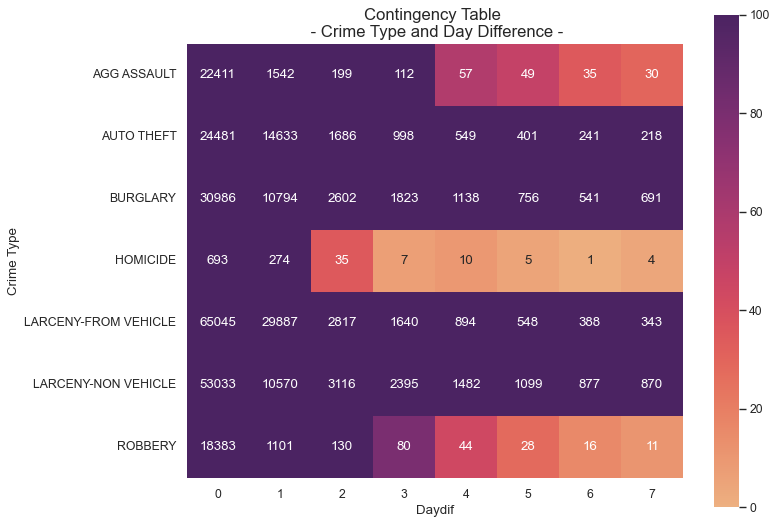

In [70]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

res = sns.heatmap(df_viz, annot=True, fmt='d', cmap="flare", vmin=0.0, vmax=100.0)

plt.title('Contingency Table \n - Crime Type and Day Difference -',fontsize=15)
# plt.savefig("plot_contingency_table_crimetype_daydif.png", bbox_inches='tight', dpi=100)

plt.show()

In [11]:
# df_viz.drop([0], axis=1, inplace=True)
# df_viz

#### 3) Stacked Bar Chart - Crime Type by Day Difference

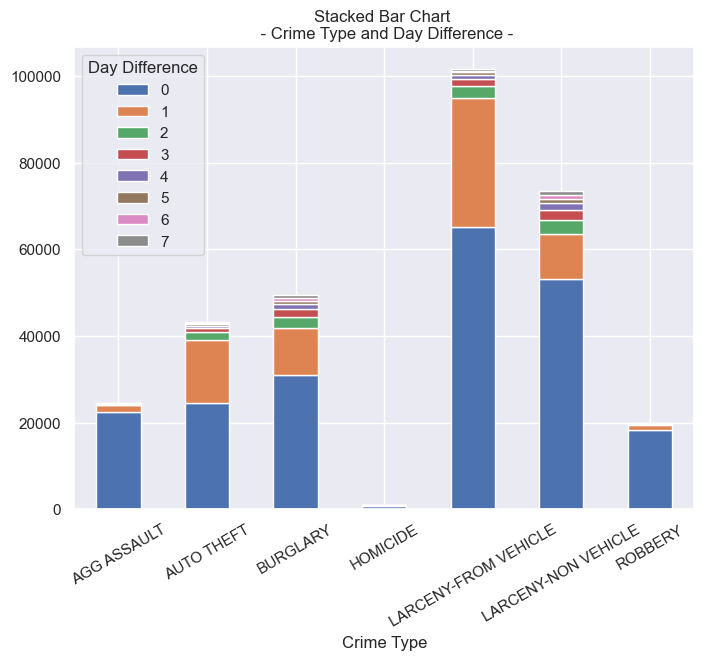

In [12]:
ax = df_viz.plot(kind='bar', figsize=(8, 6), stacked=True, rot=30)

# aannotations
# for c in ax.containers:
    # set the bar label
    # ax.bar_label(c, label_type='center')
    
ax.set_title('Stacked Bar Chart \n - Crime Type and Day Difference -',fontsize=12)

ax.legend(title = 'Day Difference', fancybox = True)    

#### 4) Histogram for Crime Type

In [45]:
# Transpose dataset
df_viz2 = df_viz.transpose()
df_viz2

Crime Type,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
Daydif,,,,,,,
0,22411,24481,30986,693,65045,53033,18383
1,1542,14633,10794,274,29887,10570,1101
2,199,1686,2602,35,2817,3116,130
3,112,998,1823,7,1640,2395,80
4,57,549,1138,10,894,1482,44
5,49,401,756,5,548,1099,28
6,35,241,541,1,388,877,16
7,30,218,691,4,343,870,11


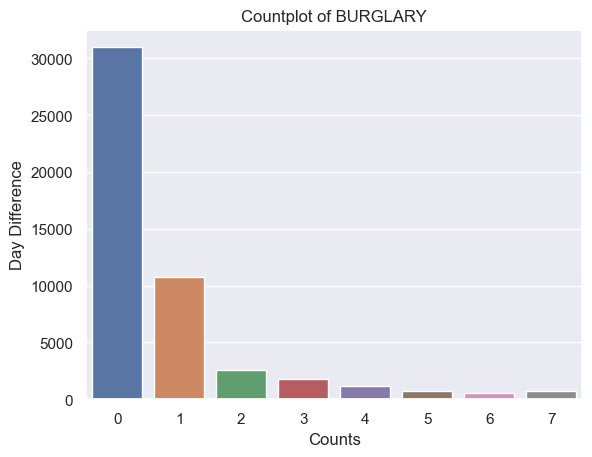

In [78]:
sns.countplot(df[df["Crime Type"]=="BURGLARY"], x="Daydif")

# Set the title and axis labels
plt.title('Countplot of BURGLARY')
plt.xlabel('Counts')
plt.ylabel('Day Difference')

# Display the histogram
plt.show()

Text(0.5, 1.0, 'Histogram of BURGLARY')

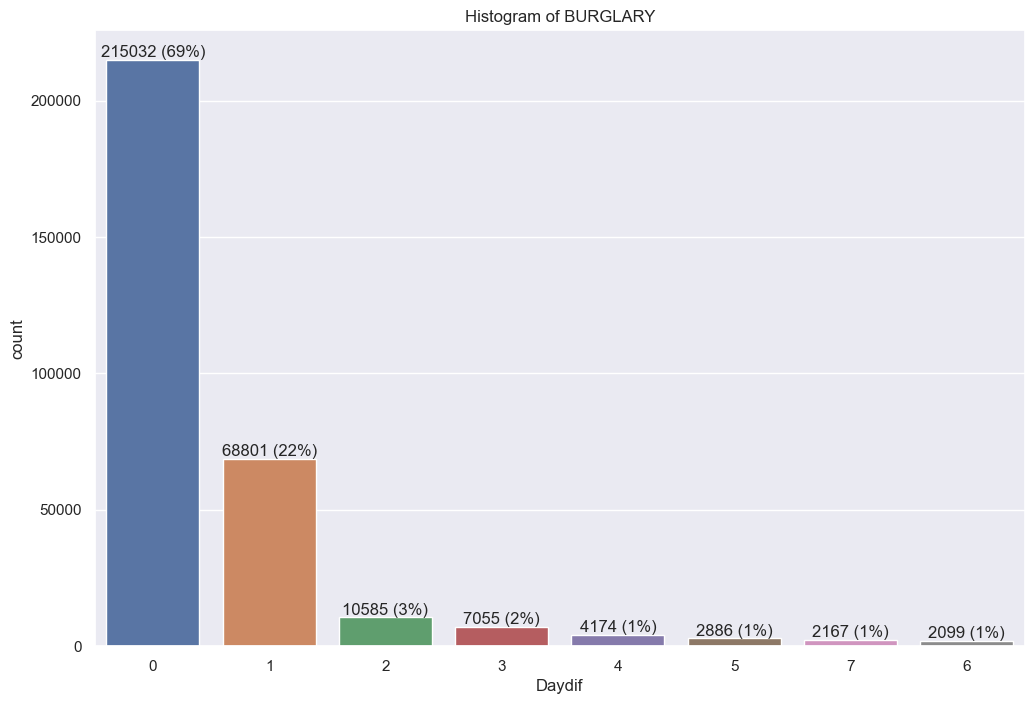

In [59]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(df[df["Crime Type"]=="BURGLARY"], x=df["Daydif"],
                   order=df["Daydif"].value_counts(ascending=False).index)
        
abs_values = df["Daydif"].value_counts(ascending=False)
rel_values = df["Daydif"].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Histogram of BURGLARY')